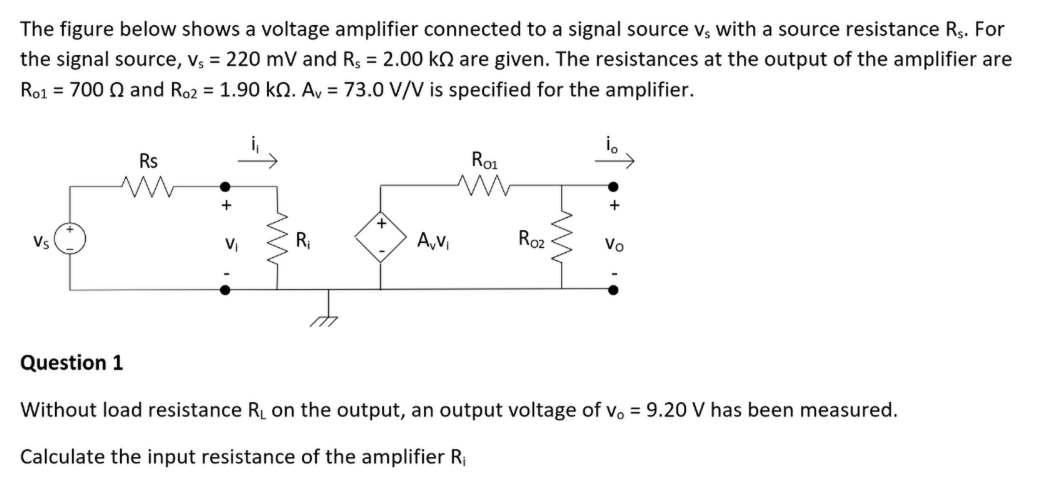

We have a voltage amplifier with:
- Source voltage $v_s = 220\ \text{mV}$ and source resistance $R_s = 2.00\ \text{k}\Omega$.
- Output $R_{O1} = 700\ \Omega$ in series with the controlled source, and $R_{O2} = 1.90\ \text{k}\Omega$ to ground.
- Output measured at $v_o = 9.20\ \text{V}$.
- Specified open-loop gain $A_v = 73.0\ \text{V/V}$.

Find voltage $v_i$: \
With no load, the output divider $R_{O1}$–$R_{O2}$. The internal generated voltage is $A_v v_i$. Thus
$$
v_o = A_v v_i \cdot \frac{R_{O2}}{R_{O1} + R_{O2}}.
$$

input divider for $R_i$: \
At the input, $v_s$ with source resistance $R_s$ feeds the amplifier’s input resistance $R_i$:
$$
v_i = v_s \cdot \frac{R_i}{R_s + R_i}.
$$
isolate $R_i$.

In [6]:
from sympy import *

vs = 0.220 # V
Rs = 2_000.0 # Ohms
Ro1 = 700.0 # Ohms
Ro2 = 1_900.0 # Ohms
Av = 73.0 # V/V
vo_meas = 9.20 # V

divider = Ro2 / (Ro1 + Ro2)
vi = vo_meas / (Av * divider)

Ri = symbols("R_i")
eq = Eq(vi, vs * Ri / (Rs + Ri))
Ri_val = solve(eq, Ri)[0]

print(f"Input voltage vi: {N(vi,3)} V")
print(f"Amplifier input resistance Ri: {N(Ri_val/1000, 3)} kOhms")


Input voltage vi: 0.172 V
Amplifier input resistance Ri: 7.25 kOhms


Therefore the input resistance is $\boxed{R_i = 7.25k\Omega}$

The amplifier’s output reasembles a Thevenin source with a divider $R_{o1}$–$R_{o2}$, the load $R_L$ is at the output node.  
Therefore the Thevenin resistance is:
$$
R_{\text{th}} = R_{o1} \parallel R_{o2} = \biggl(\frac{1}{R_{o1}}+\frac{1}{R_{o2}}\biggr)^{-1}
$$

Maximum power transfer theorem says:
$$
R_L^\star = R_{\text{th}} = R_{o1} \parallel R_{o2}.
$$

So $R_{o1}=700~\Omega$ and $R_{o2}=1900~\Omega$:
$$
R_L^\star = \biggl(\frac{1}{700}+\frac{1}{1900}\biggr)^{-1} \approx 511.54~\Omega.
$$

In [8]:

from sympy import *

Rth_eq = (1/700 + 1/1900)**-1

print("RL* =", N(Rth_eq, 3))


RL* = 512.


Thus $\boxed{R_L^\star = 512\Omega}$

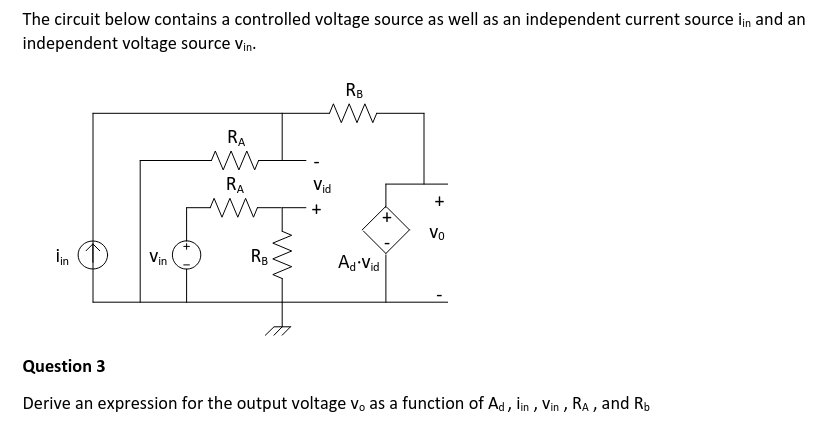

Did this on paper: \
$$v_o = A_d\cdot (v_{id+}-v_{id-})$$
$$v_{id+}=\frac{R_B}{R_A+R_B}\cdot v_{in}$$
$$\frac{v_{id-}}{R_A}+\frac{v_{id-}-v_o}{R_B}=i_{in}$$
Isolate $v_{id-}$:

In [11]:
import sympy as sp

vidm, RA, RB, vo, iin = sp.symbols('v_id_minus R_A R_B v_o i_in')
eq = sp.Eq(vidm/RA + (vidm - vo)/RB, iin)
sol = sp.solve(eq, vidm)[0]
sp.simplify(sol)
print(sp.simplify(sol))

R_A*(R_B*i_in + v_o)/(R_A + R_B)


$$v_{id-}=R_A\cdot\frac{R_B\cdot i_{in} + v_o}{R_A + R_B}$$
Insert into $v_o = A_d\cdot (v_{id+}-v_{id-})$ and isolate for $v_0$:
$$v_o = A_d\cdot ((\frac{R_B}{R_A+R_B}\cdot v_{in})-(R_A\cdot\frac{R_B\cdot i_{in} + v_o}{R_A + R_B}))$$

In [12]:
import sympy as sp

vo, Ad, RA, RB, vin, iin = sp.symbols('v_o A_d R_A R_B v_in i_in')
eq = sp.Eq(vo, Ad * ((RB/(RA+RB))*vin - (RA*(RB*iin + vo)/(RA+RB))))
sol = sp.simplify(sp.solve(eq, vo)[0])
sol


A_d*R_B*(-R_A*i_in + v_in)/(A_d*R_A + R_A + R_B)

And thus: $$\boxed{v_o \;=\; \frac{A_d\,R_B\,(v_{in}-R_A\,i_{in})}{R_A\,(A_d+1)+R_B}}$$

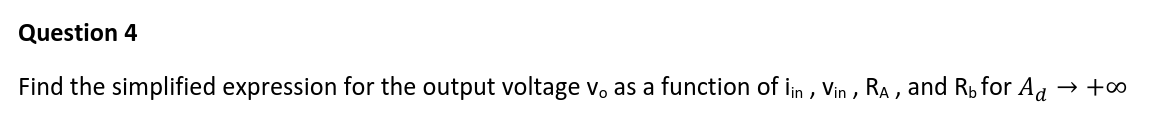

Running out of time :)

In [15]:
from sympy import symbols, limit, oo, simplify

A_d, i_in, v_in, R_A, R_b = symbols('A_d i_in v_in R_A R_b', finite=True)

v_o = (A_d*R_b*(v_in - R_A*i_in)) / (R_b + R_A*(1 + A_d))

v_o_inf = simplify(limit(v_o, A_d, oo))

v_o_inf


R_b*(-R_A*i_in + v_in)/R_A

Therefore: $$\boxed{v_0 = \frac{R_b \cdot \left(-R_A\cdot i_{in} + v_in\right)}{R_A}}$$